# Premier League Match Prediction Model

This notebook builds a machine learning model to predict Premier League match outcomes using historical data from 2020-2025.


In [1]:
import pandas as pd

In [2]:
import glob

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set_style('whitegrid')

In [7]:
files = sorted([f for f in glob.glob("20*.csv") if f.lower() != "combined.csv"])

In [8]:
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [9]:
df.to_csv("combined.csv", index=False)

In [10]:
matches = df.copy()

In [11]:
essential_cols = [
    'Date', 'Time', 'Home_Team', 'Away_Team', 'Full_Time_Home_Goals', 'Full_Time_Away_Goals',
    'Full_Time_Result', 'Home_Shots', 'Away_Shots', 'Home_Shots_On_Target', 'Away_Shots_On_Target',
    'Home_Corners', 'Away_Corners', 'Home_Fouls', 'Away_Fouls', 'Home_Yellow_Cards', 'Away_Yellow_Cards',
    'Home_Red_Cards', 'Away_Red_Cards'
]

existing_cols = [col for col in essential_cols if col in matches.columns]
matches = matches[existing_cols].copy()

print(f"✓ Data optimized. Shape: {matches.shape}")
print(f"Memory usage: {matches.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✓ Data optimized. Shape: (3130, 19)
Memory usage: 1.07 MB


In [12]:
matches.head()

,Date,Time,Home_Team,Away_Team,Full_Time_Home_Goals,Full_Time_Away_Goals,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards
0,11/08/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/08/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/08/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/08/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/08/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
matches.isnull().sum()

Date                       0
Time                     760
Home_Team               1230
Away_Team               1230
Full_Time_Home_Goals    1230
Full_Time_Away_Goals    1230
Full_Time_Result        1230
Home_Shots              1230
Away_Shots              1230
Home_Shots_On_Target    1230
Away_Shots_On_Target    1230
Home_Corners            1230
Away_Corners            1230
Home_Fouls              1230
Away_Fouls              1230
Home_Yellow_Cards       1230
Away_Yellow_Cards       1230
Home_Red_Cards          1230
Away_Red_Cards          1230
dtype: int64

In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  3130 non-null   object 
 1   Time                  2370 non-null   object 
 2   Home_Team             1900 non-null   object 
 3   Away_Team             1900 non-null   object 
 4   Full_Time_Home_Goals  1900 non-null   float64
 5   Full_Time_Away_Goals  1900 non-null   float64
 6   Full_Time_Result      1900 non-null   object 
 7   Home_Shots            1900 non-null   float64
 8   Away_Shots            1900 non-null   float64
 9   Home_Shots_On_Target  1900 non-null   float64
 10  Away_Shots_On_Target  1900 non-null   float64
 11  Home_Corners          1900 non-null   float64
 12  Away_Corners          1900 non-null   float64
 13  Home_Fouls            1900 non-null   float64
 14  Away_Fouls            1900 non-null   float64
 15  Home_Yellow_Cards    

In [15]:
pd.set_option('display.max_rows', None)   
pd.set_option('display.max_columns', None)
matches.dtypes

Date                     object
Time                     object
Home_Team                object
Away_Team                object
Full_Time_Home_Goals    float64
Full_Time_Away_Goals    float64
Full_Time_Result         object
Home_Shots              float64
Away_Shots              float64
Home_Shots_On_Target    float64
Away_Shots_On_Target    float64
Home_Corners            float64
Away_Corners            float64
Home_Fouls              float64
Away_Fouls              float64
Home_Yellow_Cards       float64
Away_Yellow_Cards       float64
Home_Red_Cards          float64
Away_Red_Cards          float64
dtype: object

In [16]:
matches["Date"] = pd.to_datetime(matches["Date"], format="%d/%m/%Y")

In [17]:
matches["Time"] = matches["Time"].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if pd.notna(x) else 0)

In [18]:
matches.dtypes

Date                    datetime64[ns]
Time                             int64
Home_Team                       object
Away_Team                       object
Full_Time_Home_Goals           float64
Full_Time_Away_Goals           float64
Full_Time_Result                object
Home_Shots                     float64
Away_Shots                     float64
Home_Shots_On_Target           float64
Away_Shots_On_Target           float64
Home_Corners                   float64
Away_Corners                   float64
Home_Fouls                     float64
Away_Fouls                     float64
Home_Yellow_Cards              float64
Away_Yellow_Cards              float64
Home_Red_Cards                 float64
Away_Red_Cards                 float64
dtype: object

In [19]:
matches.head()

,Date,Time,Home_Team,Away_Team,Full_Time_Home_Goals,Full_Time_Away_Goals,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards
0,2017-08-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
home_df = matches.copy()

In [21]:
home_df['Points'] = home_df['Full_Time_Result'].map({'H': 3, 'D': 1, 'A': 0})

In [22]:
home_df['Result'] = home_df['Full_Time_Result'].map({'H': 'Win', 'D': 'Draw', 'A': 'Loss'})

In [23]:
home_df['Goals_Against'] = home_df['Full_Time_Away_Goals']

In [24]:
home_df['Goals_For'] = home_df['Full_Time_Home_Goals']

In [25]:
home_df['Venue'] = 'Home'

In [26]:
home_df['Opponent'] = home_df['Away_Team']

In [27]:
home_df['Team'] = home_df['Home_Team']

In [28]:
home_df.head()

,Date,Time,Home_Team,Away_Team,Full_Time_Home_Goals,Full_Time_Away_Goals,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Points,Result,Goals_Against,Goals_For,Venue,Opponent,Team
0,2017-08-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN
1,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN
2,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN
3,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN
4,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN


In [29]:
away_df = matches.copy()

In [30]:
away_df['Points'] = away_df['Full_Time_Result'].map({'A': 3, 'D': 1, 'H': 0})

In [31]:
away_df['Result'] = away_df['Full_Time_Result'].map({'A': 'Win', 'D': 'Draw', 'H': 'Loss'})

In [32]:
away_df['Goals_Against'] = away_df['Full_Time_Home_Goals']

In [33]:
away_df['Goals_For'] = away_df['Full_Time_Away_Goals']

In [34]:
away_df['Venue'] = 'Away'

In [35]:
away_df['Opponent'] = away_df['Home_Team']

In [36]:
away_df['Team'] = away_df['Away_Team']

In [37]:
away_df.head()

,Date,Time,Home_Team,Away_Team,Full_Time_Home_Goals,Full_Time_Away_Goals,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Points,Result,Goals_Against,Goals_For,Venue,Opponent,Team
0,2017-08-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away,NaN,NaN
1,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away,NaN,NaN
2,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away,NaN,NaN
3,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away,NaN,NaN
4,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away,NaN,NaN


In [38]:
matches = pd.concat([home_df, away_df], ignore_index=True)

In [39]:
matches.head()

,Date,Time,Home_Team,Away_Team,Full_Time_Home_Goals,Full_Time_Away_Goals,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Points,Result,Goals_Against,Goals_For,Venue,Opponent,Team
0,2017-08-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN
1,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN
2,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN
3,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN
4,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN


In [40]:
matches = matches.sort_values(['Date', 'Team']).reset_index(drop=True)

In [41]:
matches["Venue_Code"] = matches["Venue"].astype("category").cat.codes

In [42]:
matches["Day_Code"] = matches["Date"].dt.dayofweek

In [43]:
matches["Opp_Code"] = matches["Opponent"].astype("category").cat.codes

In [44]:
matches["Shots"] = matches.apply(lambda x: x["Home_Shots"] if x["Venue"] == "Home" else x["Away_Shots"], axis=1)

In [45]:
matches["Red_Cards"] = matches.apply(lambda x: x["Home_Red_Cards"] if x["Venue"] == "Home" else x["Away_Red_Cards"], axis=1)

In [46]:
matches["Yellow_Cards"] = matches.apply(lambda x: x["Home_Yellow_Cards"] if x["Venue"] == "Home" else x["Away_Yellow_Cards"], axis=1)

In [47]:
matches["Corners_Against"] = matches.apply(lambda x: x["Away_Corners"] if x["Venue"] == "Home" else x["Home_Corners"], axis=1)

In [48]:
matches["Corners"] = matches.apply(lambda x: x["Home_Corners"] if x["Venue"] == "Home" else x["Away_Corners"], axis=1)

In [49]:
matches["Shots_On_Target_Against"] = matches.apply(lambda x: x["Away_Shots_On_Target"] if x["Venue"] == "Home" else x["Home_Shots_On_Target"], axis=1)

In [50]:
matches["Shots_Against"] = matches.apply(lambda x: x["Away_Shots"] if x["Venue"] == "Home" else x["Home_Shots"], axis=1)

In [51]:
matches["Shots_On_Target"] = matches.apply(lambda x: x["Home_Shots_On_Target"] if x["Venue"] == "Home" else x["Away_Shots_On_Target"], axis=1)

In [52]:
matches["Goal_Difference"] = matches["Goals_For"] - matches["Goals_Against"]

In [53]:
matches["Fouls_Against"] = matches.apply(lambda x: x["Away_Fouls"] if x["Venue"] == "Home" else x["Home_Fouls"], axis=1)

In [54]:
matches["Fouls"] = matches.apply(lambda x: x["Home_Fouls"] if x["Venue"] == "Home" else x["Away_Fouls"], axis=1)

In [55]:
matches["Corner_Difference"] = matches["Corners"] - matches["Corners_Against"]

In [56]:
matches["Shots_Efficiency_Against"] = matches["Shots_On_Target_Against"] / (matches["Shots_Against"] + 1)

In [57]:
matches["Shots_Efficiency"] = matches["Shots_On_Target"] / (matches["Shots"] + 1)

In [58]:
matches.head()

,Date,Time,Home_Team,Away_Team,Full_Time_Home_Goals,Full_Time_Away_Goals,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Points,Result,Goals_Against,Goals_For,Venue,Opponent,Team,Venue_Code,Day_Code,Opp_Code,Shots,Red_Cards,Yellow_Cards,Corners_Against,Corners,Shots_On_Target_Against,Shots_Against,Shots_On_Target,Goal_Difference,Fouls_Against,Fouls,Corner_Difference,Shots_Efficiency_Against,Shots_Efficiency
0,2017-08-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,1,4,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away,NaN,NaN,0,4,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,1,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,1,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,1,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
print(f"Total Matches: {len(matches)}")
print(f"Date Range: {matches['Date'].min().date()} to {matches['Date'].max().date()}")
print(f"Unique Teams: {matches['Team'].nunique()}")
print(f"\n Result Distribution:")
print(matches['Result'].value_counts())
print(f"\n Venue Split:")
print(matches['Venue'].value_counts())

Total Matches: 6260
Date Range: 2017-08-11 to 2025-10-26
Unique Teams: 27

 Result Distribution:
Result
Win     1467
Loss    1467
Draw     866
Name: count, dtype: int64

 Venue Split:
Venue
Home    3130
Away    3130
Name: count, dtype: int64


In [60]:
print("Available Columns:")
print(matches.columns.tolist())

Available Columns:
['Date', 'Time', 'Home_Team', 'Away_Team', 'Full_Time_Home_Goals', 'Full_Time_Away_Goals', 'Full_Time_Result', 'Home_Shots', 'Away_Shots', 'Home_Shots_On_Target', 'Away_Shots_On_Target', 'Home_Corners', 'Away_Corners', 'Home_Fouls', 'Away_Fouls', 'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards', 'Away_Red_Cards', 'Points', 'Result', 'Goals_Against', 'Goals_For', 'Venue', 'Opponent', 'Team', 'Venue_Code', 'Day_Code', 'Opp_Code', 'Shots', 'Red_Cards', 'Yellow_Cards', 'Corners_Against', 'Corners', 'Shots_On_Target_Against', 'Shots_Against', 'Shots_On_Target', 'Goal_Difference', 'Fouls_Against', 'Fouls', 'Corner_Difference', 'Shots_Efficiency_Against', 'Shots_Efficiency']


C:\Users\aryan\AppData\Local\Temp\ipykernel_7060\1053109737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matches, x='Result', palette='viridis')


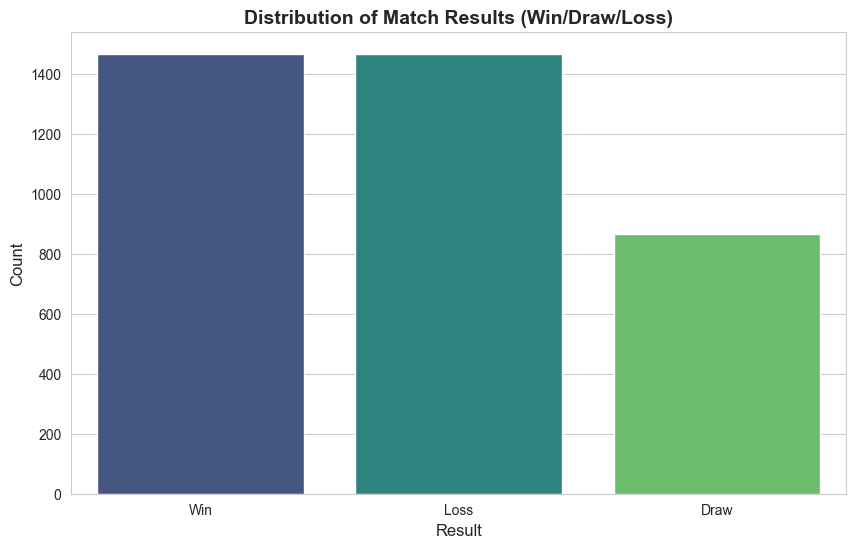

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=matches, x='Result', palette='viridis')
plt.title('Distribution of Match Results (Win/Draw/Loss)', fontsize=14, fontweight='bold')
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

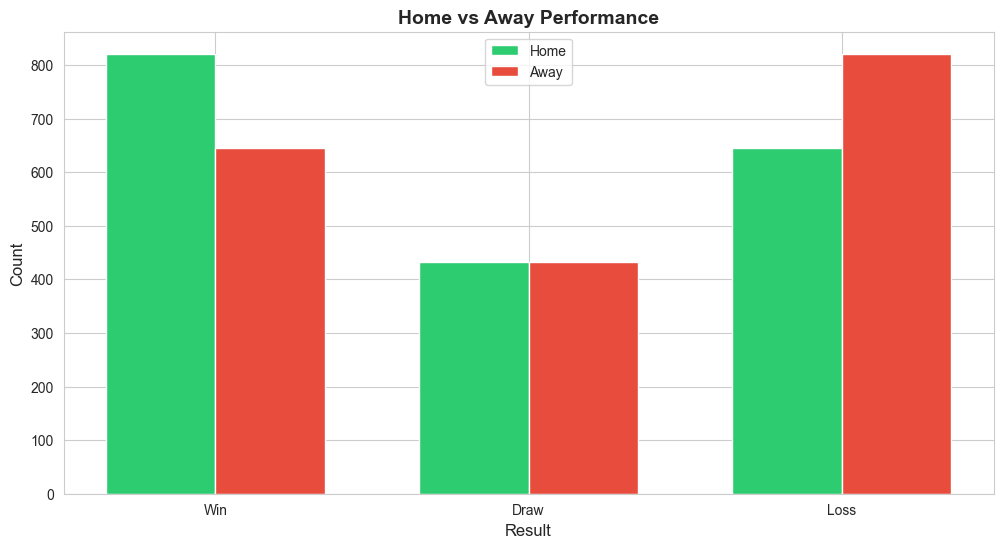

In [62]:
plt.figure(figsize=(12, 6))
home_results = matches[matches['Venue'] == 'Home']['Result'].value_counts()
away_results = matches[matches['Venue'] == 'Away']['Result'].value_counts()
x = np.arange(3)
width = 0.35
plt.bar(x - width/2, home_results.reindex(['Win', 'Draw', 'Loss']), width, label='Home', color='#2ecc71')
plt.bar(x + width/2, away_results.reindex(['Win', 'Draw', 'Loss']), width, label='Away', color='#e74c3c')
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Home vs Away Performance', fontsize=14, fontweight='bold')
plt.xticks(x, ['Win', 'Draw', 'Loss'])
plt.legend()
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_7060\2484015793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='rocket')


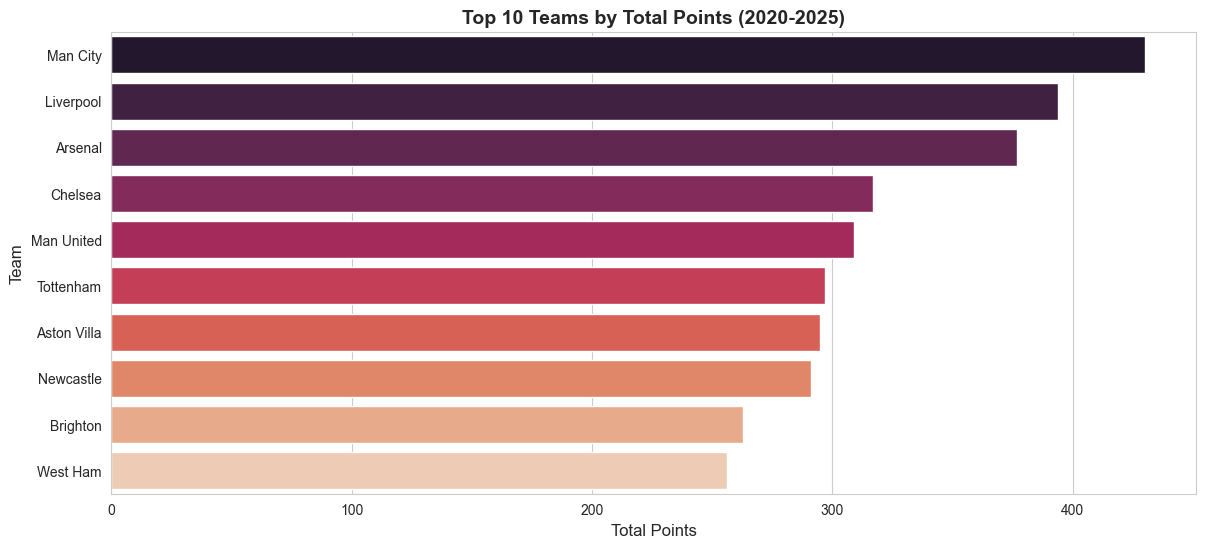

In [63]:
plt.figure(figsize=(14, 6))
top_teams = matches.groupby('Team')['Points'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_teams.values, y=top_teams.index, palette='rocket')
plt.title('Top 10 Teams by Total Points (2020-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Total Points', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.show()

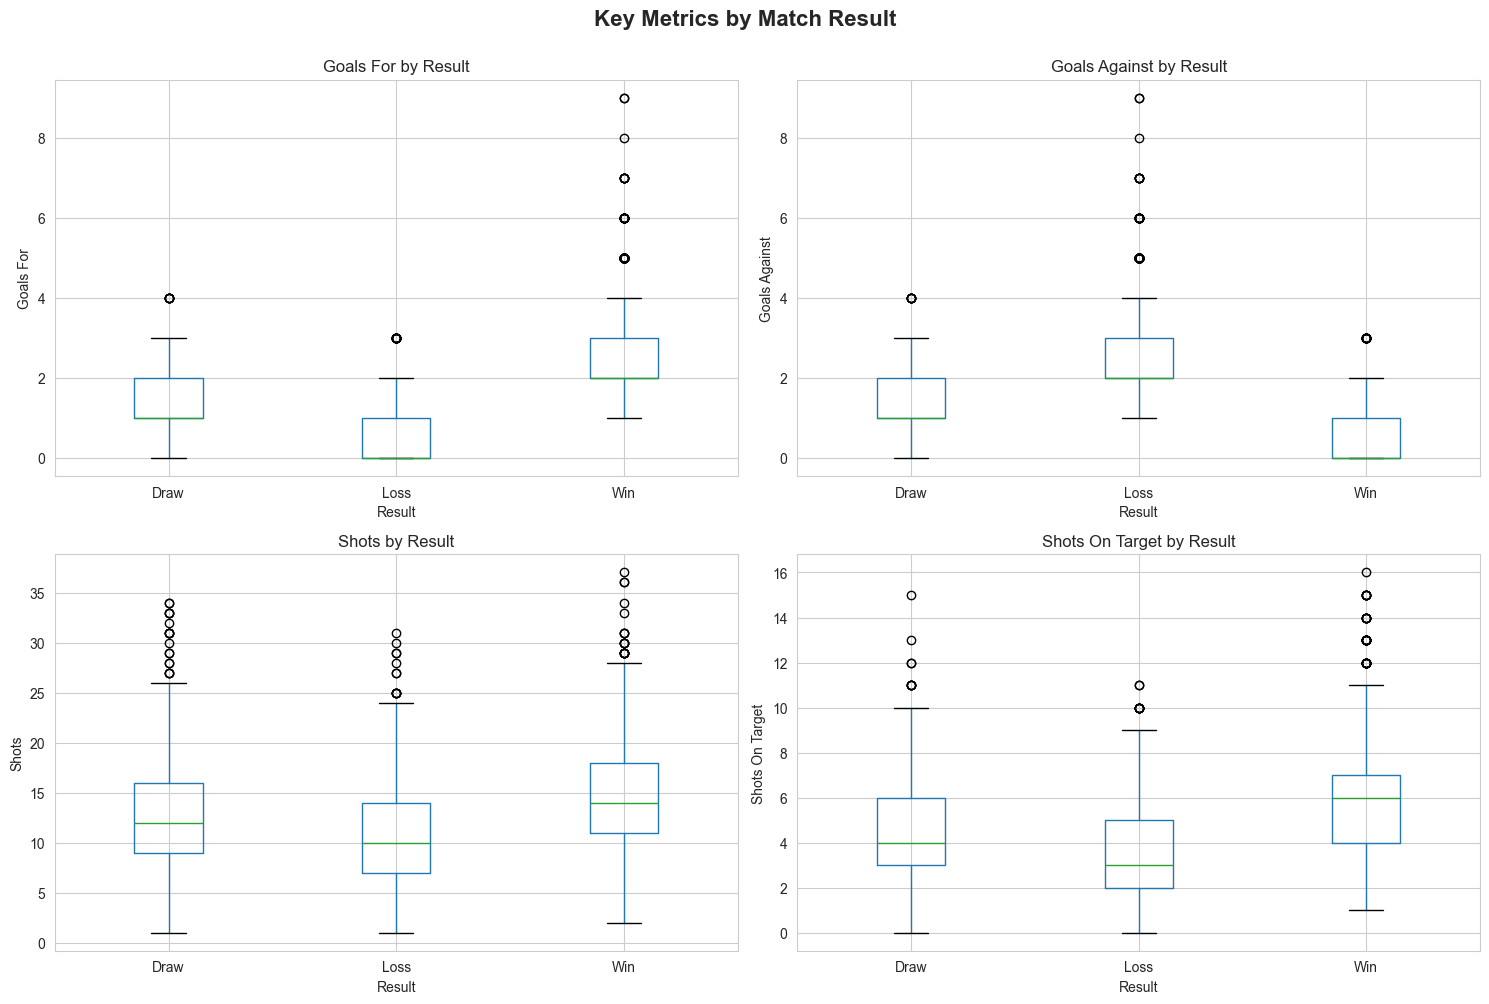

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
matches.boxplot(column='Goals_For', by='Result', ax=axes[0,0])
axes[0,0].set_title('Goals For by Result')
axes[0,0].set_xlabel('Result')
axes[0,0].set_ylabel('Goals For')
matches.boxplot(column='Goals_Against', by='Result', ax=axes[0,1])
axes[0,1].set_title('Goals Against by Result')
axes[0,1].set_xlabel('Result')
axes[0,1].set_ylabel('Goals Against')
matches.boxplot(column='Shots', by='Result', ax=axes[1,0])
axes[1,0].set_title('Shots by Result')
axes[1,0].set_xlabel('Result')
axes[1,0].set_ylabel('Shots')
matches.boxplot(column='Shots_On_Target', by='Result', ax=axes[1,1])
axes[1,1].set_title('Shots On Target by Result')
axes[1,1].set_xlabel('Result')
axes[1,1].set_ylabel('Shots On Target')
plt.suptitle('Key Metrics by Match Result', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

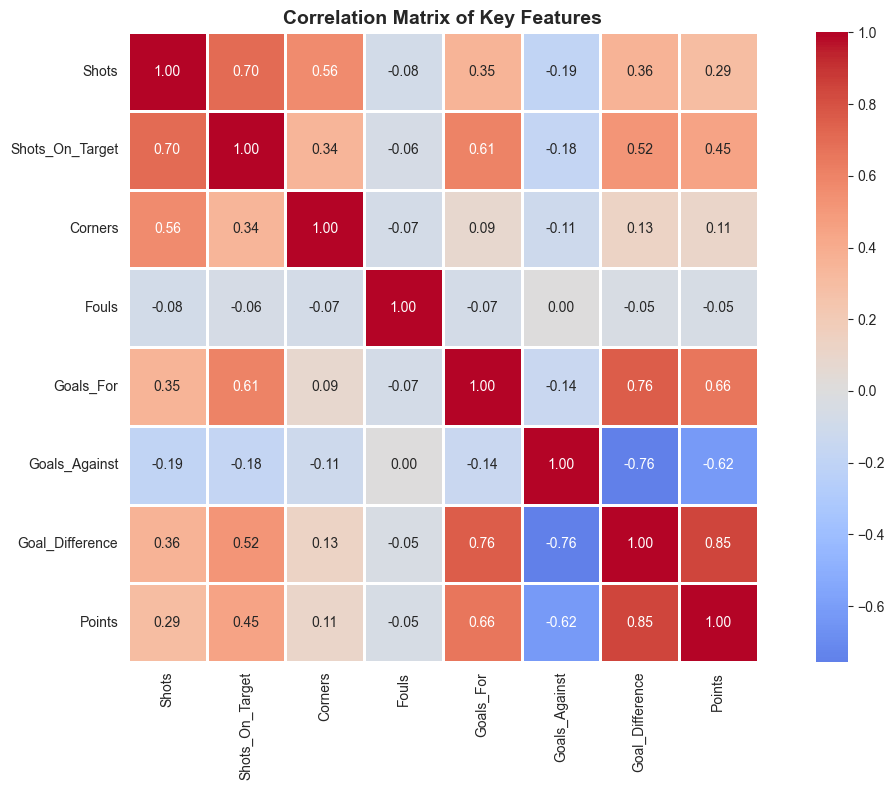

In [65]:
plt.figure(figsize=(12, 8))
corr_features = ['Shots', 'Shots_On_Target', 'Corners', 'Fouls', 'Goals_For', 'Goals_Against', 'Goal_Difference', 'Points']
correlation_matrix = matches[corr_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Key Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

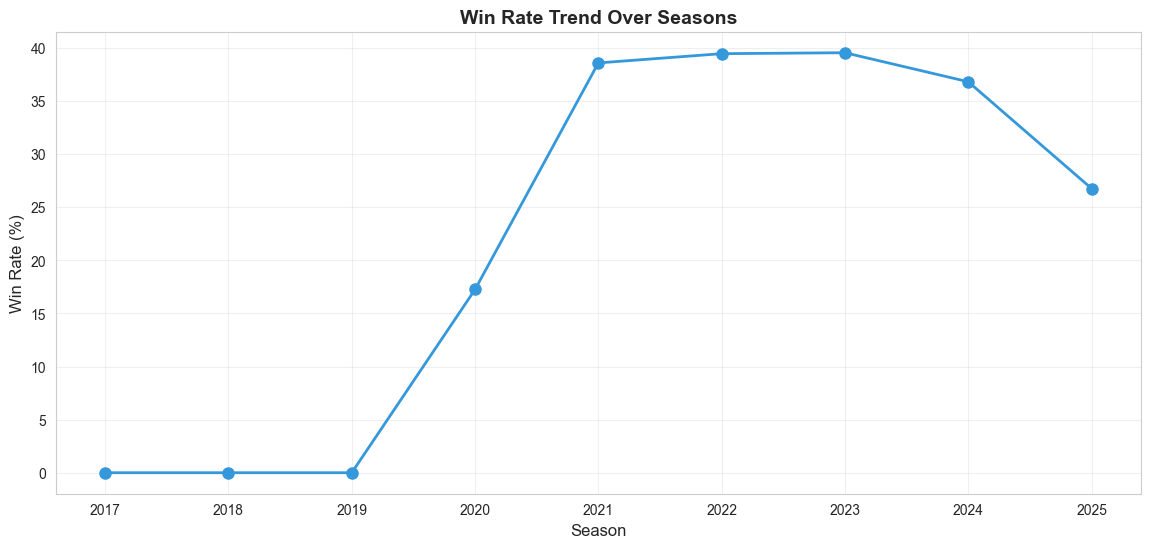

In [66]:
plt.figure(figsize=(14, 6))
matches['Season'] = matches['Date'].dt.year
season_wins = matches[matches['Result'] == 'Win'].groupby('Season').size()
season_total = matches.groupby('Season').size()
win_rate_by_season = (season_wins / season_total * 100).fillna(0)
plt.plot(win_rate_by_season.index, win_rate_by_season.values, marker='o', linewidth=2, markersize=8, color='#3498db')
plt.title('Win Rate Trend Over Seasons', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Win Rate (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

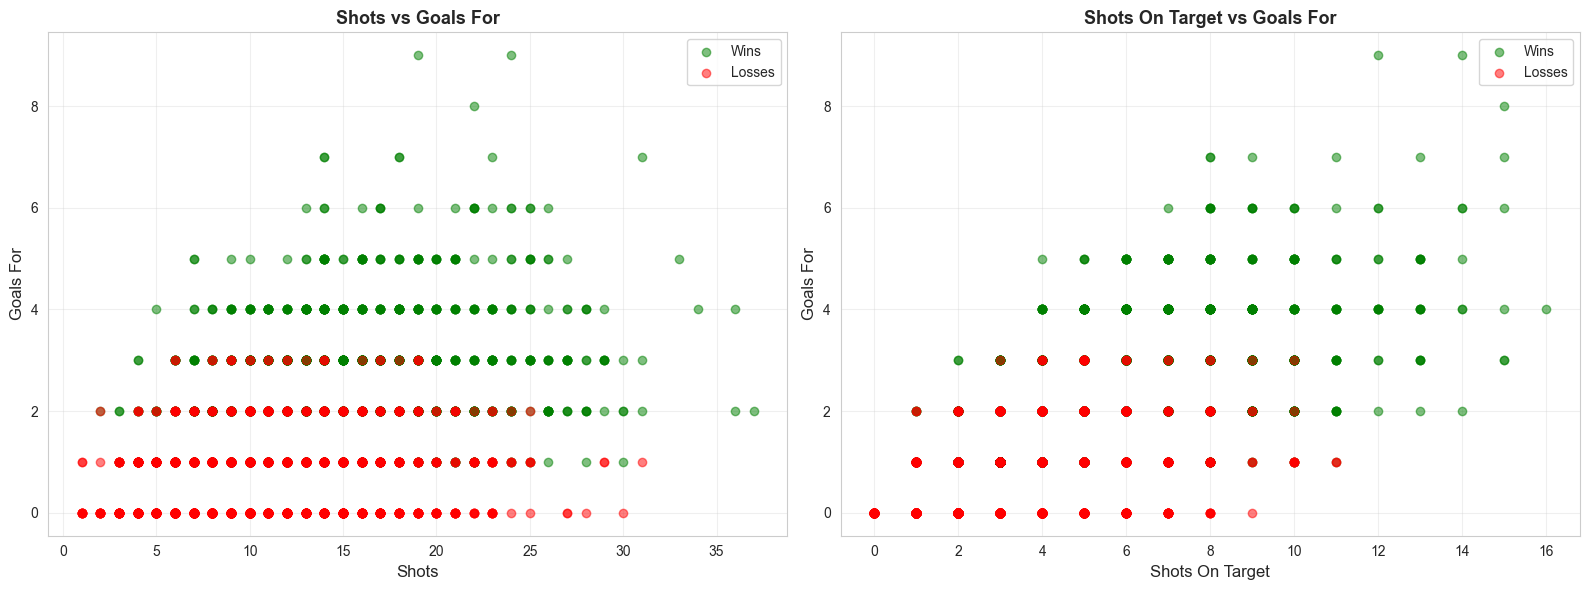

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
win_matches = matches[matches['Result'] == 'Win']
loss_matches = matches[matches['Result'] == 'Loss']
axes[0].scatter(win_matches['Shots'], win_matches['Goals_For'], alpha=0.5, color='green', label='Wins')
axes[0].scatter(loss_matches['Shots'], loss_matches['Goals_For'], alpha=0.5, color='red', label='Losses')
axes[0].set_xlabel('Shots', fontsize=12)
axes[0].set_ylabel('Goals For', fontsize=12)
axes[0].set_title('Shots vs Goals For', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[1].scatter(win_matches['Shots_On_Target'], win_matches['Goals_For'], alpha=0.5, color='green', label='Wins')
axes[1].scatter(loss_matches['Shots_On_Target'], loss_matches['Goals_For'], alpha=0.5, color='red', label='Losses')
axes[1].set_xlabel('Shots On Target', fontsize=12)
axes[1].set_ylabel('Goals For', fontsize=12)
axes[1].set_title('Shots On Target vs Goals For', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()

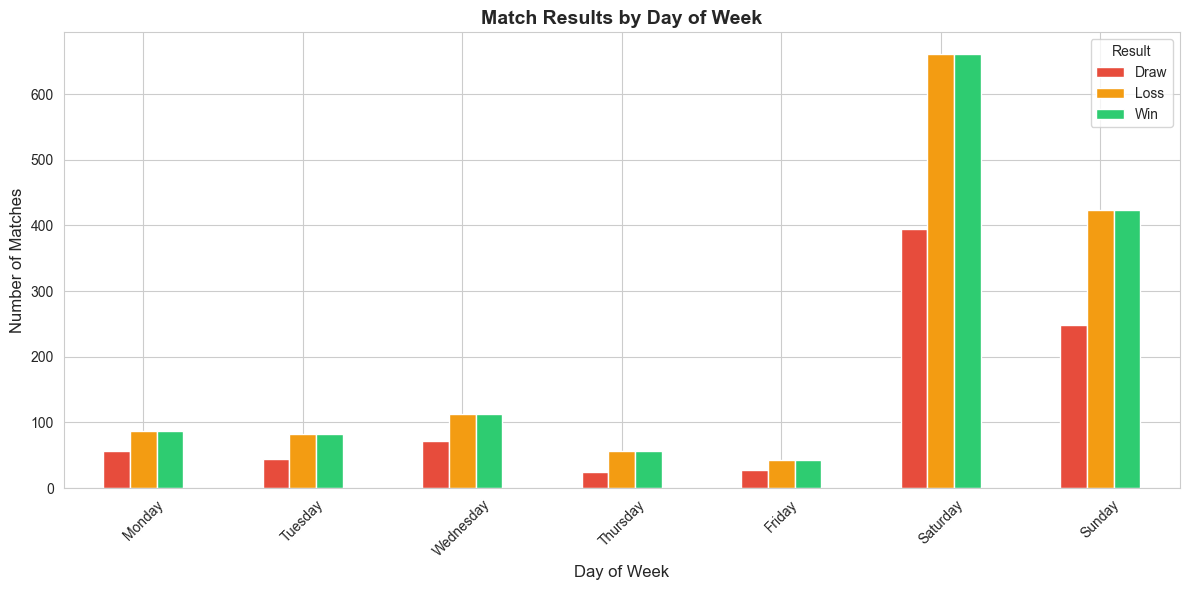

In [68]:
plt.figure(figsize=(12, 6))
matches['Day_of_Week'] = matches['Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_results = matches.groupby(['Day_of_Week', 'Result']).size().unstack(fill_value=0)
day_results = day_results.reindex(day_order)
day_results.plot(kind='bar', stacked=False, color=['#e74c3c', '#f39c12', '#2ecc71'], ax=plt.gca())
plt.title('Match Results by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Result')
plt.tight_layout()
plt.show()

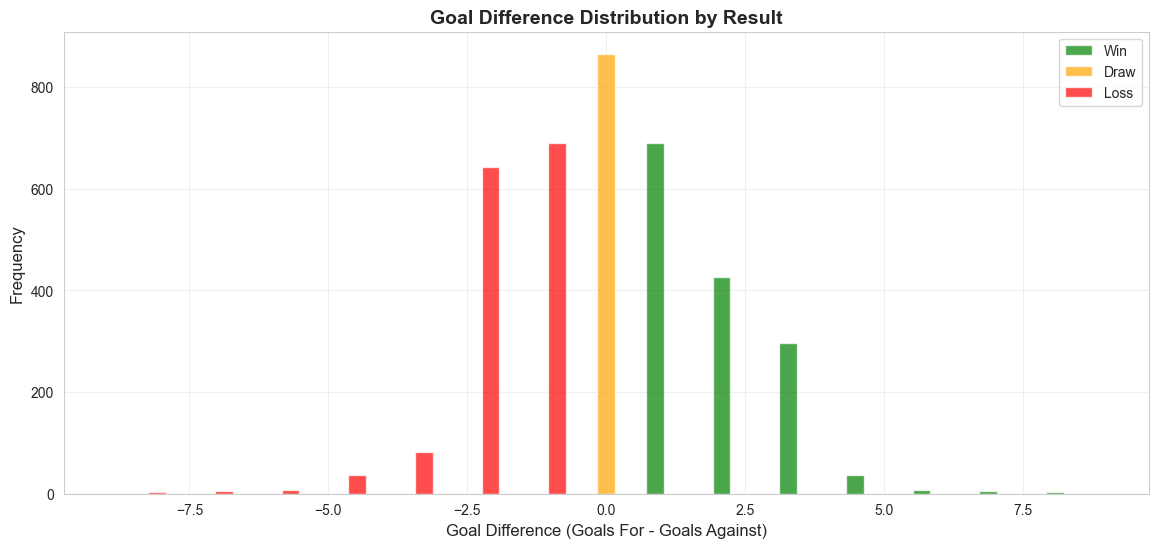

In [69]:
plt.figure(figsize=(14, 6))
goal_diff = matches['Goals_For'] - matches['Goals_Against']
plt.hist([goal_diff[matches['Result'] == 'Win'], goal_diff[matches['Result'] == 'Draw'], goal_diff[matches['Result'] == 'Loss']], bins=15, label=['Win', 'Draw', 'Loss'], color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Goal Difference Distribution by Result', fontsize=14, fontweight='bold')
plt.xlabel('Goal Difference (Goals For - Goals Against)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_7060\2083212323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=matches, x='Result', y='Shots_Efficiency', palette='muted')


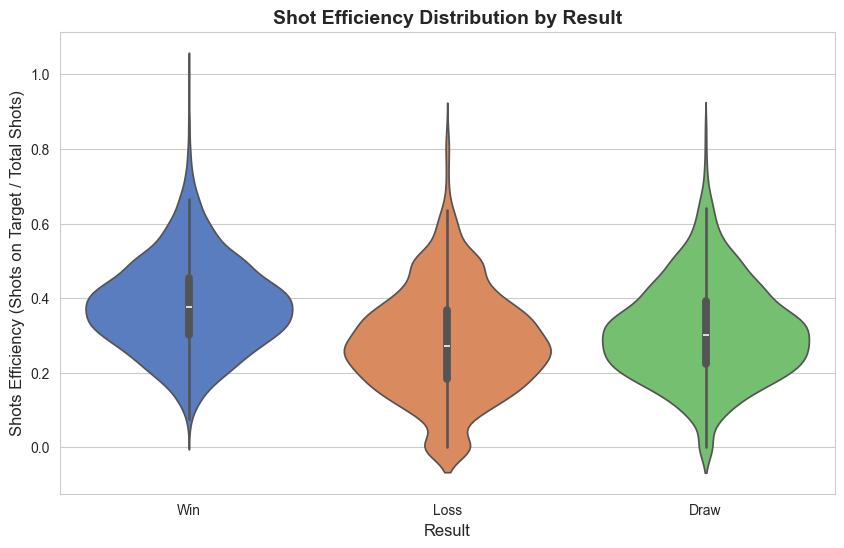

In [70]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=matches, x='Result', y='Shots_Efficiency', palette='muted')
plt.title('Shot Efficiency Distribution by Result', fontsize=14, fontweight='bold')
plt.xlabel('Result', fontsize=12)
plt.ylabel('Shots Efficiency (Shots on Target / Total Shots)', fontsize=12)
plt.show()

In [71]:

matches["Win_Rate_Last3"] = 0.0
matches["Points_Last3"] = 0.0
matches["Win_Streak"] = 0
matches["Unbeaten_Streak"] = 0

for team in matches["Team"].unique():
    team_matches = matches[matches["Team"] == team].sort_values("Date")
    

    for idx in team_matches.index:
        team_history = matches[(matches["Team"] == team) & (matches["Date"] < matches.loc[idx, "Date"])]
        if len(team_history) >= 3:
            last_3 = team_history.tail(3)
            matches.loc[idx, "Win_Rate_Last3"] = (last_3["Result"] == "Win").sum() / 3
            matches.loc[idx, "Points_Last3"] = last_3["Points"].sum()
    

    current_streak = 0
    current_unbeaten = 0
    for idx in team_matches.index:
        result = matches.loc[idx, "Result"]
        if current_streak > 0 and result == "Win":
            current_streak += 1
        elif current_streak < 0 and result == "Loss":
            current_streak -= 1
        elif result == "Win":
            current_streak = 1
        elif result == "Loss":
            current_streak = -1
        else:
            current_streak = 0
        
        if result in ["Win", "Draw"]:
            current_unbeaten += 1
        else:
            current_unbeaten = 0
        
        matches.loc[idx, "Win_Streak"] = current_streak
        matches.loc[idx, "Unbeaten_Streak"] = current_unbeaten

In [72]:
print("Available Columns:")
print(matches.columns.tolist())
matches.head()

Available Columns:
['Date', 'Time', 'Home_Team', 'Away_Team', 'Full_Time_Home_Goals', 'Full_Time_Away_Goals', 'Full_Time_Result', 'Home_Shots', 'Away_Shots', 'Home_Shots_On_Target', 'Away_Shots_On_Target', 'Home_Corners', 'Away_Corners', 'Home_Fouls', 'Away_Fouls', 'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards', 'Away_Red_Cards', 'Points', 'Result', 'Goals_Against', 'Goals_For', 'Venue', 'Opponent', 'Team', 'Venue_Code', 'Day_Code', 'Opp_Code', 'Shots', 'Red_Cards', 'Yellow_Cards', 'Corners_Against', 'Corners', 'Shots_On_Target_Against', 'Shots_Against', 'Shots_On_Target', 'Goal_Difference', 'Fouls_Against', 'Fouls', 'Corner_Difference', 'Shots_Efficiency_Against', 'Shots_Efficiency', 'Season', 'Day_of_Week', 'Win_Rate_Last3', 'Points_Last3', 'Win_Streak', 'Unbeaten_Streak']


,Date,Time,Home_Team,Away_Team,Full_Time_Home_Goals,Full_Time_Away_Goals,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Points,Result,Goals_Against,Goals_For,Venue,Opponent,Team,Venue_Code,Day_Code,Opp_Code,Shots,Red_Cards,Yellow_Cards,Corners_Against,Corners,Shots_On_Target_Against,Shots_Against,Shots_On_Target,Goal_Difference,Fouls_Against,Fouls,Corner_Difference,Shots_Efficiency_Against,Shots_Efficiency,Season,Day_of_Week,Win_Rate_Last3,Points_Last3,Win_Streak,Unbeaten_Streak
0,2017-08-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,1,4,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Friday,0.0,0.0,0,0
1,2017-08-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away,NaN,NaN,0,4,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Friday,0.0,0.0,0,0
2,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,1,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Saturday,0.0,0.0,0,0
3,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,1,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Saturday,0.0,0.0,0,0
4,2017-08-12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home,NaN,NaN,1,5,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Saturday,0.0,0.0,0,0


In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:

rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, max_depth=15, 
                            min_samples_leaf=2, random_state=1, max_features='sqrt')

In [75]:
matches["Target"] = (matches["Result"] == "Win").astype(int)

In [76]:
predictors = ["Venue_Code", "Opp_Code", "Time", "Day_Code"]

In [77]:
train = matches[matches["Date"] < '2024-01-01']

In [78]:
test = matches[matches["Date"] >= '2024-01-01']

In [79]:
rf.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
preds = rf.predict(test[predictors])

In [81]:

from sklearn.metrics import accuracy_score, precision_score

accuracy_baseline = accuracy_score(test["Target"], preds)
precision_baseline = precision_score(test["Target"], preds)

print("Baseline Model (4 features):")
print(f"Accuracy: {accuracy_baseline:.4f}")
print(f"Precision: {precision_baseline:.4f}")

Baseline Model (4 features):
Accuracy: 0.6674
Precision: 0.4837


In [82]:
print(f"Precision: {precision_baseline:.4f}")

Precision: 0.4837


In [83]:
print(f"Accuracy: {accuracy_baseline:.4f}")

Accuracy: 0.6674


In [84]:
print("Baseline Model (4 features):")
print(predictors)

Baseline Model (4 features):
['Venue_Code', 'Opp_Code', 'Time', 'Day_Code']


In [85]:
precision_baseline = precision_score(test["Target"], preds)

In [86]:
accuracy_baseline = accuracy_score(test["Target"], preds)

In [87]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("Date")
    rolling_stats = group[cols].rolling(4, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [88]:
cols = ["Goals_For", "Goals_Against", "Shots_On_Target", "Shots_On_Target_Against", 
        "Goal_Difference", "Points", "Win_Rate_Last3", "Shots_Efficiency", 
        "Shots_Efficiency_Against", "Corner_Difference"]
new_cols = [f"{c}_rolling" for c in cols]

In [89]:
new_cols = [f"{c}_rolling" for c in cols]

In [90]:
print("Calculating rolling averages for each team...")
matches_rolling = matches.groupby("Team").apply(lambda x: rolling_averages(x, cols, new_cols))
print(f"✓ Rolling averages calculated! Shape: {matches_rolling.shape}")
matches_rolling.head()

Calculating rolling averages for each team...
✓ Rolling averages calculated! Shape: (3692, 60)


C:\Users\aryan\AppData\Local\Temp\ipykernel_7060\4066501965.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby("Team").apply(lambda x: rolling_averages(x, cols, new_cols))


Date  Time   Home_Team    Away_Team  Full_Time_Home_Goals  \
Team                                                                           
Arsenal 2356 2020-10-17  1050    Man City      Arsenal                   1.0   
        2386 2020-10-25  1155     Arsenal    Leicester                   0.0   
        2404 2020-11-01   990  Man United      Arsenal                   0.0   
        2428 2020-11-08  1155     Arsenal  Aston Villa                   0.0   
        2444 2020-11-22   990       Leeds      Arsenal                   0.0   

              Full_Time_Away_Goals Full_Time_Result  Home_Shots  Away_Shots  \
Team                                                                          
Arsenal 2356                   0.0                H        13.0        11.0   
        2386                   1.0                A        12.0         6.0   
        2404                   1.0                A         8.0         7.0   
        2428                   3.0                A        13.0        15.0   
        2444                   0.0                D        25.0         9.0   

              Home_Shots_On_Target  Away_Shots_On_Target  Home_Corners  \
Team                                                                     
Arsenal 2356                   5.0                   3.0           6.0   
        2386                   4.0                   2.0           9.0   
        2404                   2.0                   2.0           6.0   
        2428                   2.0                   6.0           3.0   
        2444                   4.0                   2.0           5.0   

              Away_Corners  Home_Fouls  Away_Fouls  Home_Yellow_Cards  \
Team                                                                    
Arsenal 2356           6.0        15.0        10.0                4.0   
        2386           3.0        13.0         9.0                3.0   
        2404           3.0        12.0        12.0                3.0   
        2428           8.0        11.0        13.0                0.0   
        2444           3.0         9.0         8.0                3.0   

              Away_Yellow_Cards  Home_Red_Cards  Away_Red_Cards  Points  \
Team                                                                      
Arsenal 2356                1.0             0.0             0.0     0.0   
        2386                5.0             0.0             0.0     0.0   
        2404                3.0             0.0             0.0     3.0   
        2428                0.0             0.0             0.0     0.0   
        2444                0.0             0.0             1.0     1.0   

             Result  Goals_Against  Goals_For Venue     Opponent     Team  \
Team                                                                        
Arsenal 2356   Loss            1.0        0.0  Away     Man City  Arsenal   
        2386   Loss            1.0        0.0  Home    Leicester  Arsenal   
        2404    Win            0.0        1.0  Away   Man United  Arsenal   
        2428   Loss            3.0        0.0  Home  Aston Villa  Arsenal   
        2444   Draw            0.0        0.0  Away        Leeds  Arsenal   

              Venue_Code  Day_Code  Opp_Code  Shots  Red_Cards  Yellow_Cards  \
Team                                                                           
Arsenal 2356           0         5        15   11.0        0.0           1.0   
        2386           1         6        12   12.0        0.0           3.0   
        2404           0         6        16    7.0        0.0           3.0   
        2428           1         6         1   13.0        0.0           0.0   
        2444           0         6        11    9.0        1.0           0.0   

              Corners_Against  Corners  Shots_On_Target_Against  \
Team                                                              
Arsenal 2356              6.0      6.0                      5.0   
        2386              3.0      9.0       

In [91]:
matches_rolling = matches_rolling.droplevel('Team')
matches_rolling.head()

,Date,Time,Home_Team,Away_Team,Full_Time_Home_Goals,Full_Time_Away_Goals,Full_Time_Result,Home_Shots,Away_Shots,Home_Shots_On_Target,Away_Shots_On_Target,Home_Corners,Away_Corners,Home_Fouls,Away_Fouls,Home_Yellow_Cards,Away_Yellow_Cards,Home_Red_Cards,Away_Red_Cards,Points,Result,Goals_Against,Goals_For,Venue,Opponent,Team,Venue_Code,Day_Code,Opp_Code,Shots,Red_Cards,Yellow_Cards,Corners_Against,Corners,Shots_On_Target_Against,Shots_Against,Shots_On_Target,Goal_Difference,Fouls_Against,Fouls,Corner_Difference,Shots_Efficiency_Against,Shots_Efficiency,Season,Day_of_Week,Win_Rate_Last3,Points_Last3,Win_Streak,Unbeaten_Streak,Target,Goals_For_rolling,Goals_Against_rolling,Shots_On_Target_rolling,Shots_On_Target_Against_rolling,Goal_Difference_rolling,Points_rolling,Win_Rate_Last3_rolling,Shots_Efficiency_rolling,Shots_Efficiency_Against_rolling,Corner_Difference_rolling
2356,2020-10-17,1050,Man City,Arsenal,1.0,0.0,H,13.0,11.0,5.0,3.0,6.0,6.0,15.0,10.0,4.0,1.0,0.0,0.0,0.0,Loss,1.0,0.0,Away,Man City,Arsenal,0,5,15,11.0,0.0,1.0,6.0,6.0,5.0,13.0,3.0,-1.0,15.0,10.0,0.0,0.357143,0.250000,2020,Saturday,0.666667,6.0,-1,0,0,2.00,1.25,4.25,3.75,0.75,2.25,0.166667,0.529464,0.295671,-0.75
2386,2020-10-25,1155,Arsenal,Leicester,0.0,1.0,A,12.0,6.0,4.0,2.0,9.0,3.0,13.0,9.0,3.0,5.0,0.0,0.0,0.0,Loss,1.0,0.0,Home,Leicester,Arsenal,1,6,12,12.0,0.0,3.0,3.0,9.0,2.0,6.0,4.0,-1.0,9.0,13.0,6.0,0.285714,0.307692,2020,Sunday,0.333333,3.0,-2,0,0,1.25,1.50,3.50,4.50,-0.25,1.50,0.333333,0.484821,0.301623,-1.00
2404,2020-11-01,990,Man United,Arsenal,0.0,1.0,A,8.0,7.0,2.0,2.0,6.0,3.0,12.0,12.0,3.0,3.0,0.0,0.0,3.0,Win,0.0,1.0,Away,Man United,Arsenal,0,6,16,7.0,0.0,3.0,6.0,3.0,2.0,8.0,2.0,1.0,12.0,12.0,-3.0,0.222222,0.250000,2020,Sunday,0.333333,3.0,1,1,1,0.75,1.50,3.75,4.25,-0.75,0.75,0.416667,0.467995,0.323052,0.00
2428,2020-11-08,1155,Arsenal,Aston Villa,0.0,3.0,A,13.0,15.0,2.0,6.0,3.0,8.0,11.0,13.0,0.0,0.0,0.0,0.0,0.0,Loss,3.0,0.0,Home,Aston Villa,Arsenal,1,6,1,13.0,0.0,0.0,8.0,3.0,6.0,15.0,2.0,-3.0,13.0,11.0,-5.0,0.375000,0.142857,2020,Sunday,0.333333,3.0,-1,0,0,0.75,0.75,3.50,2.75,0.00,1.50,0.500000,0.380495,0.287698,0.25
2444,2020-11-22,990,Leeds,Arsenal,0.0,0.0,D,25.0,9.0,4.0,2.0,5.0,3.0,9.0,8.0,3.0,0.0,0.0,1.0,1.0,Draw,0.0,0.0,Away,Leeds,Arsenal,0,6,11,9.0,1.0,0.0,5.0,3.0,4.0,25.0,2.0,0.0,9.0,8.0,-2.0,0.153846,0.200000,2020,Sunday,0.333333,3.0,0,1,0,0.25,1.25,2.75,3.75,-1.00,0.75,0.416667,0.237637,0.310020,-0.50


In [92]:
matches_rolling.index = range(matches_rolling.shape[0])

In [93]:
def make_predictions(data, predictors):
    train = data[data["Date"] < '2024-01-01']
    test = data[data["Date"] >= '2024-01-01']
    rf.fit(train[predictors], train["Target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["Target"], predicted=preds), index=test.index)
    accuracy = accuracy_score(test["Target"], preds)
    precision = precision_score(test["Target"], preds)
    return combined, accuracy, precision

In [94]:
all_predictors = ["Venue_Code", "Opp_Code", "Time", "Day_Code"] + new_cols

train_fi = matches_rolling[matches_rolling["Date"] < '2024-01-01']
test_fi = matches_rolling[matches_rolling["Date"] >= '2024-01-01']

rf.fit(train_fi[all_predictors], train_fi["Target"])
feature_importance = pd.DataFrame({
    'feature': all_predictors,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

In [95]:
feature_importance = pd.DataFrame({'feature': all_predictors, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)

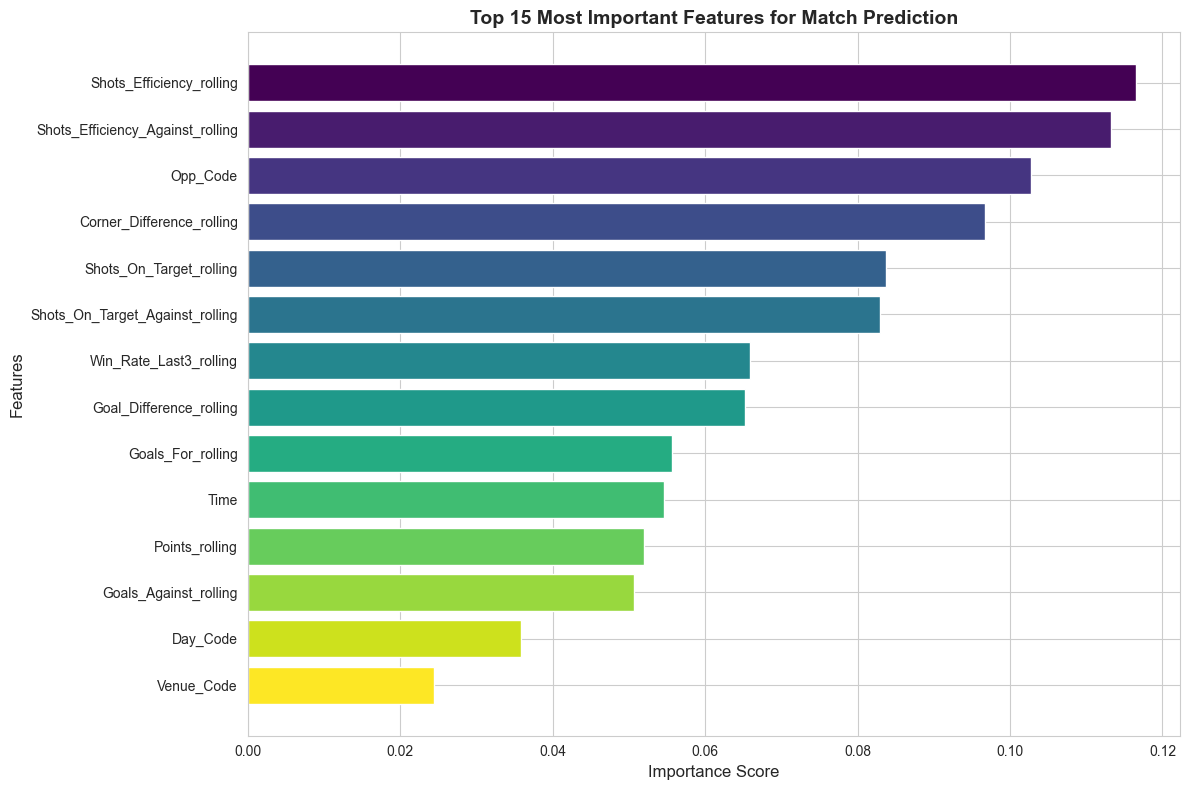

In [96]:
plt.figure(figsize=(12, 8))
top_15_features = feature_importance.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_features)))
plt.barh(range(len(top_15_features)), top_15_features['importance'], color=colors)
plt.yticks(range(len(top_15_features)), top_15_features['feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Most Important Features for Match Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [97]:
rf.fit(train_fi[all_predictors], train_fi["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
test_fi = matches_rolling[matches_rolling["Date"] >= '2024-01-01']

In [99]:
train_fi = matches_rolling[matches_rolling["Date"] < '2024-01-01']

In [100]:
top_features = feature_importance.head(12)['feature'].tolist()

In [101]:
matches_rolling["Opp_Points_rolling"] = 0.0
matches_rolling["Opp_Goal_Difference_rolling"] = 0.0
matches_rolling["Opp_Win_Rate_Last3_rolling"] = 0.0

for idx, row in matches_rolling.iterrows():
    opponent = row["Opponent"]
    match_date = row["Date"]
    
    opp_history = matches_rolling[(matches_rolling["Team"] == opponent) & 
                                   (matches_rolling["Date"] < match_date)]
    
    if len(opp_history) >= 4:
        recent_opp = opp_history.tail(4)
        matches_rolling.loc[idx, "Opp_Points_rolling"] = recent_opp["Points_rolling"].mean()
        matches_rolling.loc[idx, "Opp_Goal_Difference_rolling"] = recent_opp["Goal_Difference_rolling"].mean()
        matches_rolling.loc[idx, "Opp_Win_Rate_Last3_rolling"] = recent_opp["Win_Rate_Last3_rolling"].mean()

In [102]:
enhanced_predictors = top_features + ["Opp_Points_rolling", "Opp_Goal_Difference_rolling", "Opp_Win_Rate_Last3_rolling"]

matches_enhanced = matches_rolling[
    (matches_rolling["Opp_Points_rolling"] > 0) & 
    (matches_rolling["Date"] >= '2020-01-01')
].copy()

In [103]:
matches_enhanced = matches_rolling[(matches_rolling["Opp_Points_rolling"] > 0) & (matches_rolling["Date"] >= '2020-01-01')].copy()

In [104]:
matches_enhanced["Form_Advantage"] = matches_enhanced["Points_rolling"] - matches_enhanced["Opp_Points_rolling"]
matches_enhanced["Goal_Diff_Advantage"] = matches_enhanced["Goal_Difference_rolling"] - matches_enhanced["Opp_Goal_Difference_rolling"]
matches_enhanced["Attack_Advantage"] = matches_enhanced["Shots_On_Target_rolling"] - matches_enhanced["Shots_On_Target_Against_rolling"]
matches_enhanced["Win_Rate_Advantage"] = matches_enhanced["Win_Rate_Last3_rolling"] - matches_enhanced["Opp_Win_Rate_Last3_rolling"]
matches_enhanced["Home_Form_Boost"] = matches_enhanced["Venue_Code"] * matches_enhanced["Points_rolling"]

In [105]:
matches_enhanced["Home_Form_Boost"] = matches_enhanced["Venue_Code"] * matches_enhanced["Points_rolling"]

In [106]:
matches_enhanced["Win_Rate_Advantage"] = matches_enhanced["Win_Rate_Last3_rolling"] - matches_enhanced["Opp_Win_Rate_Last3_rolling"]

In [107]:
matches_enhanced["Attack_Advantage"] = matches_enhanced["Shots_On_Target_rolling"] - matches_enhanced["Shots_On_Target_Against_rolling"]

In [108]:
matches_enhanced["Goal_Diff_Advantage"] = matches_enhanced["Goal_Difference_rolling"] - matches_enhanced["Opp_Goal_Difference_rolling"]

In [109]:
final_predictors = enhanced_predictors + [
    "Form_Advantage", "Goal_Diff_Advantage", "Attack_Advantage", 
    "Win_Rate_Advantage", "Home_Form_Boost"
]

combined_best, accuracy_best, precision_best = make_predictions(matches_enhanced, final_predictors)

print("Best Model (20 features):")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")

print("\nComparison:")
print(f"Baseline: {accuracy_baseline:.4f} accuracy, {precision_baseline:.4f} precision")
print(f"Best: {accuracy_best:.4f} accuracy, {precision_best:.4f} precision")
print(f"Improvement: +{(accuracy_best - accuracy_baseline)*100:.2f}% accuracy")

Best Model (20 features):
Accuracy: 0.6810
Precision: 0.6231

Comparison:
Baseline: 0.6674 accuracy, 0.4837 precision
Best: 0.6810 accuracy, 0.6231 precision
Improvement: +1.36% accuracy


In [110]:
print(f"Improvement: +{(accuracy_best - accuracy_baseline)*100:.2f}% accuracy")

Improvement: +1.36% accuracy


In [111]:
print(f"Best: {accuracy_best:.4f} accuracy, {precision_best:.4f} precision")

Best: 0.6810 accuracy, 0.6231 precision


In [112]:
print(f"Baseline: {accuracy_baseline:.4f} accuracy, {precision_baseline:.4f} precision")

Baseline: 0.6674 accuracy, 0.4837 precision


In [113]:
print(f"Accuracy: {accuracy_best:.4f}")

Accuracy: 0.6810


In [114]:
print("Best Model (20 features):")

Best Model (20 features):


In [115]:
def predict_match(team, opponent, venue="Home", time="15:00"):
    
    
    venue_code = 0 if venue == "Away" else 1
    time_minutes = int(time.split(':')[0]) * 60 + int(time.split(':')[1])
    
    
    opp_code = matches["Opponent"].astype("category").cat.categories.get_loc(opponent) if opponent in matches["Opponent"].values else 0
    
    
    team_recent = matches_enhanced[matches_enhanced["Team"] == team].sort_values("Date").tail(1)
    opp_recent = matches_enhanced[matches_enhanced["Team"] == opponent].sort_values("Date").tail(1)
    
    if len(team_recent) == 0 or len(opp_recent) == 0:
        return None, None
    
    
    features = {}
    
    
    if "Opp_Code" in final_predictors:
        features["Opp_Code"] = opp_code
    if "Time" in final_predictors:
        features["Time"] = time_minutes
    

    for col in final_predictors:
        if col in team_recent.columns and col not in ["Opp_Code", "Time"]:
            if col.startswith("Opp_"):
                
                opp_col = col.replace("Opp_", "")
                if opp_col in opp_recent.columns:
                    features[col] = opp_recent[opp_col].values[0]
            elif col in ["Form_Advantage", "Goal_Diff_Advantage", "Attack_Advantage", "Win_Rate_Advantage", "Home_Form_Boost"]:
                
                if col == "Form_Advantage":
                    features[col] = team_recent["Points_rolling"].values[0] - opp_recent["Points_rolling"].values[0]
                elif col == "Goal_Diff_Advantage":
                    features[col] = team_recent["Goal_Difference_rolling"].values[0] - opp_recent["Goal_Difference_rolling"].values[0]
                elif col == "Attack_Advantage":
                    features[col] = team_recent["Shots_On_Target_rolling"].values[0] - team_recent["Shots_On_Target_Against_rolling"].values[0]
                elif col == "Win_Rate_Advantage":
                    features[col] = team_recent["Win_Rate_Last3_rolling"].values[0] - opp_recent["Win_Rate_Last3_rolling"].values[0]
                elif col == "Home_Form_Boost":
                    features[col] = venue_code * team_recent["Points_rolling"].values[0]
            else:
                features[col] = team_recent[col].values[0]
    
    
    pred_df = pd.DataFrame([features])
    prediction = rf.predict(pred_df[final_predictors])[0]
    win_probability = rf.predict_proba(pred_df[final_predictors])[0][1]
    
    return prediction, win_probability

In [116]:
print("Matchday Prediction of Round 10- Nov 1 2025:")
prediction, win_probability = predict_match("Nott'm Forest", "Man United", venue="Home", time="20:30")
print(f"\nNott'm Forest vs Man United (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")

prediction, win_probability = predict_match("Burnley", "Arsenal", venue="Home", time="20:30")
print(f"\nBurnley vs Arsenal (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")

prediction, win_probability = predict_match("Brighton", "Leeds", venue="Home", time="20:30")
print(f"\nBrighton vs Leeds (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")

prediction, win_probability = predict_match("Crystal Palace", "Brentford", venue="Home", time="20:30")
print(f"\nCrystal Palace vs Brentford (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")

prediction, win_probability = predict_match("Fulham", "Wolves", venue="Home", time="19:30")
print(f"\nFulham vs Wolves (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}") 

prediction, win_probability = predict_match("Tottenham", "Chelsea", venue="Home", time="23:00")
print(f"\nTottenham vs Chelsea (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")

prediction, win_probability = predict_match("Tottenham", "Chelsea", venue="Home", time="23:00")
print(f"\nTottenham vs Chelsea (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")

prediction, win_probability = predict_match("Liverpool", "Aston Villa", venue="Home", time="1:30")
print(f"\nLiverpool vs Aston Villa (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")

prediction, win_probability = predict_match("West Ham", "Newcastle", venue="Home", time="19:30")
print(f"\nWest Ham vs Newcastle (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")

prediction, win_probability = predict_match("Man City", "Bournemouth", venue="Home", time="22:00")
print(f"\nMan City vs Bournemouth (Home)")
print(f"Prediction: {'Win' if prediction == 1 else 'Draw/Loss'}")
print(f"Win Probability: {win_probability:.2%}")


Matchday Prediction of Round 10- Nov 1 2025:

Nott'm Forest vs Man United (Home)
Prediction: Win
Win Probability: 51.18%

Burnley vs Arsenal (Home)
Prediction: Draw/Loss
Win Probability: 40.70%

Brighton vs Leeds (Home)
Prediction: Win
Win Probability: 74.19%

Crystal Palace vs Brentford (Home)
Prediction: Draw/Loss
Win Probability: 34.26%

Fulham vs Wolves (Home)
Prediction: Draw/Loss
Win Probability: 49.35%

Tottenham vs Chelsea (Home)
Prediction: Draw/Loss
Win Probability: 33.32%

Tottenham vs Chelsea (Home)
Prediction: Draw/Loss
Win Probability: 33.32%

Liverpool vs Aston Villa (Home)
Prediction: Draw/Loss
Win Probability: 34.72%

West Ham vs Newcastle (Home)
Prediction: Draw/Loss
Win Probability: 21.45%

Man City vs Bournemouth (Home)
Prediction: Win
Win Probability: 60.50%
